In [1]:
import os.path

import numpy as np
import pandas as pd

In [2]:
classesDict = {
    "T1":0,
    "T1_c":1,
    "T2":2,
    "T2-FLAIR":3,
    "FS":4,
    "PD":5,
    "SWI":6,
    "GRE":7,
    "T2*":8,
    "DWI":9,
    "ADC":10,
    "BOLD":11,
    "FlowSensitve":12,
    "PWI":13,
    "ASL":14,
    "Hippo":15,
    "DTI":16,
    "Other":17
}

In [3]:
labels_path = '/home/soenke/Internship/DeepDicomSortFork/prototyping/combinedDfs/CombinedTestingFrame_A2_A3_O3_egd_rss_hb_pruned.txt'

In [4]:
Labels = pd.read_csv(labels_path,names=['ID','label','extra'],sep='\t', dtype={'ID':str,'label':int,'extra':int})

In [5]:
Label_name_list = list(classesDict.keys())

In [6]:
Labels

,ID,label,extra
0,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0
1,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,17,0
2,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0
3,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,15,0
4,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0
...,...,...,...
66775,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
66776,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
66777,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
66778,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0


In [7]:
def extractDataset(ID):
    if 'ADNI2' in ID:
        return 'ADNI2'
    elif 'ADNI3' in ID:
        return 'ADNI3'
    elif 'OASIS3' in ID:
        return 'OASIS3'
    elif 'egd' in ID:
        return 'egd'
    elif 'Rstudy' in ID:
        return 'rss'
    elif 'HeartBrain' in ID:
        return 'HeartBrain'
    return None

def assignStringLabel(label, labelList):
    return labelList[label]

In [8]:
FullLabelFrame = Labels.copy()

In [9]:
FullLabelFrame['dataset'] = FullLabelFrame['ID'].apply(extractDataset)
FullLabelFrame['string_label'] = FullLabelFrame['label'].apply(assignStringLabel, labelList=Label_name_list)

In [10]:
FullLabelFrame.groupby('dataset')['string_label'].value_counts()/15

dataset     string_label
ADNI2       PD               28.0
            T2               28.0
ADNI3       Other           558.0
            T2*             373.0
            T1              238.0
            T2-FLAIR        216.0
            Hippo           197.0
            PWI              97.0
            ASL              49.0
            DTI               8.0
            SWI               3.0
HeartBrain  Other            87.0
            PWI              33.0
            ASL              31.0
            SWI              25.0
            T2-FLAIR         24.0
            Hippo            15.0
            T1               13.0
OASIS3      Other           563.0
            BOLD            331.0
            T2              254.0
            T1              230.0
            DWI             216.0
            T2*             145.0
            ASL             108.0
            GRE              96.0
            T2-FLAIR         81.0
            SWI              81.0
            FlowSensitv

In [11]:
print(FullLabelFrame.groupby('string_label')['dataset'].value_counts().to_latex())

\begin{tabular}{llr}
\toprule
 &  & count \\
string_label & dataset &  \\
\midrule
ADC & egd & 300 \\
\cline{1-3}
\multirow[t]{3}{*}{ASL} & OASIS3 & 1620 \\
 & ADNI3 & 735 \\
 & HeartBrain & 465 \\
\cline{1-3}
\multirow[t]{2}{*}{BOLD} & OASIS3 & 4965 \\
 & rss & 30 \\
\cline{1-3}
\multirow[t]{2}{*}{DTI} & rss & 120 \\
 & ADNI3 & 120 \\
\cline{1-3}
\multirow[t]{2}{*}{DWI} & OASIS3 & 3240 \\
 & egd & 405 \\
\cline{1-3}
FlowSensitve & OASIS3 & 1050 \\
\cline{1-3}
GRE & OASIS3 & 1440 \\
\cline{1-3}
\multirow[t]{2}{*}{Hippo} & ADNI3 & 2955 \\
 & HeartBrain & 225 \\
\cline{1-3}
\multirow[t]{5}{*}{Other} & OASIS3 & 8445 \\
 & ADNI3 & 8370 \\
 & HeartBrain & 1305 \\
 & rss & 90 \\
 & egd & 90 \\
\cline{1-3}
\multirow[t]{2}{*}{PD} & ADNI2 & 420 \\
 & rss & 30 \\
\cline{1-3}
\multirow[t]{3}{*}{PWI} & ADNI3 & 1455 \\
 & egd & 750 \\
 & HeartBrain & 495 \\
\cline{1-3}
\multirow[t]{4}{*}{SWI} & OASIS3 & 1215 \\
 & HeartBrain & 375 \\
 & ADNI3 & 45 \\
 & rss & 30 \\
\cline{1-3}
\multirow[t]{5}{*}{T1

In [12]:
vc = pd.DataFrame(FullLabelFrame.groupby('string_label')['dataset'].value_counts())

In [20]:
vc

count
string_label dataset          
ADC          egd           300
ASL          OASIS3       1620
             ADNI3         735
             HeartBrain    465
BOLD         OASIS3       4965
             rss            30
DTI          rss           120
             ADNI3         120
DWI          OASIS3       3240
             egd           405
FlowSensitve OASIS3       1050
GRE          OASIS3       1440
Hippo        ADNI3        2955
             HeartBrain    225
Other        OASIS3       8445
             ADNI3        8370
             HeartBrain   1305
             rss            90
             egd            90
PD           ADNI2         420
             rss            30
PWI          ADNI3        1455
             egd           750
             HeartBrain    495
SWI          OASIS3       1215
             HeartBrain    375
             ADNI3          45
             rss            30
T1           ADNI3        3570
             OASIS3       3450
             egd           465
             HeartBrain    195
             rss            30
T1_c         egd           585
T2           OASIS3       3810
             ADNI2         420
             egd           405
T2*          ADNI3        5595
             OASIS3       2175
T2-FLAIR     ADNI3        3240
             OASIS3       1215
             egd           450
             HeartBrain    360
             rss            30

In [75]:
first_level_labels = []
second_level_labels = []
first_level_counts = []
second_level_counts = []
for idx in vc.index:
    firstLevel = idx[0]
    secondLevel = idx[1]
    count = vc.loc[idx,'count']
    if firstLevel not in first_level_labels:
        first_level_labels.append(firstLevel)
        second_level_labels.append(secondLevel)
        first_level_counts.append(count)
        second_level_counts.append(count)
    else:
        second_level_counts.append(count)
        second_level_labels.append(secondLevel)
        first_level_counts[-1] += count
unique_second_level = list(set(second_level_labels))

In [76]:
second_level_colors = [unique_second_level.index(x) for x in second_level_labels]

In [77]:
second_level_colors = np.multiply(second_level_colors,int(np.floor(20/max(second_level_colors))))

In [79]:
second_level_colors

array([ 0, 16, 20,  4, 16, 12, 12, 20, 16,  0, 16, 16, 20,  4, 16, 20,  4,
       12,  0,  8, 12, 20,  0,  4, 16,  4, 20, 12, 20, 16,  0,  4, 12,  0,
       16,  8,  0, 20, 16, 20, 16,  0,  4, 12])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


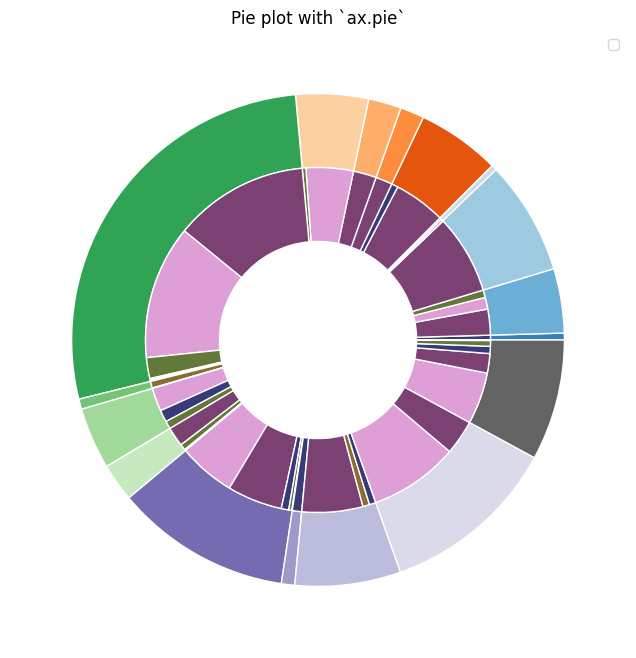

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))

size = 0.3

cmap_outer = plt.colormaps["tab20c"]
cmap_inner = plt.colormaps['tab20b']
outer_colors = cmap_outer(np.arange(len(first_level_labels)))
inner_colors = cmap_inner(second_level_colors)

ax.pie(first_level_counts, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(second_level_counts, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [13]:
labels = FullLabelFrame['string_label'].unique()

In [14]:
datasets = FullLabelFrame[FullLabelFrame['string_label']==labels[0]]['dataset'].unique()

In [15]:
FullLabelFrame['center_slide'] = FullLabelFrame['ID'].apply(lambda x: '__s12' in x)

In [16]:
VisualizeFrame = FullLabelFrame[FullLabelFrame['center_slide']]

In [17]:
# create a frame that contains labels for some visualizations
from sklearn.model_selection import train_test_split
visualize_frame = pd.DataFrame()
for label in labels:
    temp1 = VisualizeFrame[VisualizeFrame['string_label']==label]
    datasets = temp1['dataset'].unique()
    for dataset in datasets:
        df = temp1[temp1['dataset']==dataset]
        try:
            visualize, _ = train_test_split(df, train_size=2, shuffle=True, random_state=42)
        except ValueError:
            visualize = df
        visualize_frame = pd.concat([visualize_frame,visualize], axis=0)

In [18]:
visualize_frame

,ID,label,extra,dataset,string_label,center_slide
21328,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0,ADNI3,T2-FLAIR,True
12194,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0,ADNI3,T2-FLAIR,True
34114,/trinity/home/r098375/DDS/data/OASIS/OASIS3/te...,3,0,OASIS3,T2-FLAIR,True
47732,/trinity/home/r098375/DDS/data/OASIS/OASIS3/te...,3,0,OASIS3,T2-FLAIR,True
61913,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,3,0,egd,T2-FLAIR,True
...,...,...,...,...,...,...
60489,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,9,0,egd,DWI,True
62105,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,1,0,egd,T1_c,True
62904,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,1,0,egd,T1_c,True
62251,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,10,0,egd,ADC,True


In [19]:
# visualize_frame.to_csv('visualizeFrame.csv', index=False)